<a href="https://colab.research.google.com/github/nedokormysh/Start_DS_Inflation_Salaries/blob/main/Start_DS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Загрузка данных

## Данные по среднемесячная номинальной начисленной заработной плате работников

В excel документе 2 страницы с разбиением по годам. Считаем данные в два датасета.

In [2]:
URL_SALARIES = 'https://rosstat.gov.ru/storage/mediabank/tab3-zpl_2023.xlsx'

In [3]:
df_2000_2016 = pd.read_excel(URL_SALARIES, sheet_name="2000-2016 гг.", skiprows=2, index_col=0)
df_2017_2023 = pd.read_excel(URL_SALARIES, sheet_name="с 2017 г.", skiprows=4, index_col=0)

In [4]:
df_2000_2016.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0


In [5]:
df_2017_2023.head(3)

,20171),2018,2019,2020,2021,20222),"20232), 3)"
Всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выберем три вида экономической деятельности:

- Строительство
- Рыболовство и рыбоводство
- Образование

In [6]:
activities = ['рыболовство_и_рыбоводство',
              'строительство',
              'добыча_полезных_ископаемых']

In [7]:
# Преобразуем названия строк в нижний регистр и заменяем пробелы на нижнее подчеркивание
df_2000_2016.index = df_2000_2016.index.str.lower().str.replace(' ', '_').str.strip('_')
df_2017_2023.index = df_2017_2023.index.str.lower().str.replace(' ', '_').str.strip('_')

# Переименовываем строку в первой таблице
df_2000_2016.rename(index={'рыболовство,_рыбоводство':
                           'рыболовство_и_рыбоводство'}, inplace=True)

# Выбираем нужные строки из первого DataFrame
df1_activities = df_2000_2016.loc[activities]

# Выбираем нужные строки из второго DataFrame
df2_activities = df_2017_2023.loc[activities]

# Очищаем названия столбцов во втором DataFrame, оставляя только первые 4 цифры
df2_activities.columns = [str(col)[0:4] for col in df2_activities.columns]

# Удаляем лишние пробелы в начале и конце названий строк
df1_activities.index = df1_activities.index.str.strip()
df2_activities.index = df2_activities.index.str.strip()

# Объединяем два DataFrame по столбцам
salaries = pd.merge(df1_activities, df2_activities,
                    left_index=True,
                    right_index=True,
                    how='outer')
salaries.columns = salaries.columns.astype(int)
salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
рыболовство_и_рыбоводство,2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,...,37062.0,46676.0,54927.0,68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
добыча_полезных_ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,...,58959.0,63695.0,69936.0,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6


In [8]:
salaries.to_csv('salaries.csv')

## Данные по инфляции

Данные об инфляции получены на https://уровень-инфляции.рф/таблицы-инфляции



In [9]:
URL_INFLATION = 'https://raw.githubusercontent.com/nedokormysh/Start_DS_Inflation_Salaries/main/data/inflation.csv'

In [10]:
inflation = pd.read_csv(URL_INFLATION, encoding='windows-1251', index_col=0)
inflation.head()

,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
Год,,,,,,,,,,,,,
2024,7.44,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91


# EDA

## Зарплата

In [11]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, рыболовство_и_рыбоводство to добыча_полезных_ископаемых
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      float64
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      float64
 6   2006    3 non-null      float64
 7   2007    3 non-null      float64
 8   2008    3 non-null      float64
 9   2009    3 non-null      float64
 10  2010    3 non-null      float64
 11  2011    3 non-null      float64
 12  2012    3 non-null      float64
 13  2013    3 non-null      float64
 14  2014    3 non-null      float64
 15  2015    3 non-null      float64
 16  2016    3 non-null      float64
 17  2017    3 non-null      float64
 18  2018    3 non-null      float64
 19  2019    3 non-null      float64
 20  2020    3 non-null      float64
 21 

In [12]:
salaries.isnull().any().any()

False

Нет пропущенных значений. Все типы данных - float.

In [13]:
# salaries.describe()

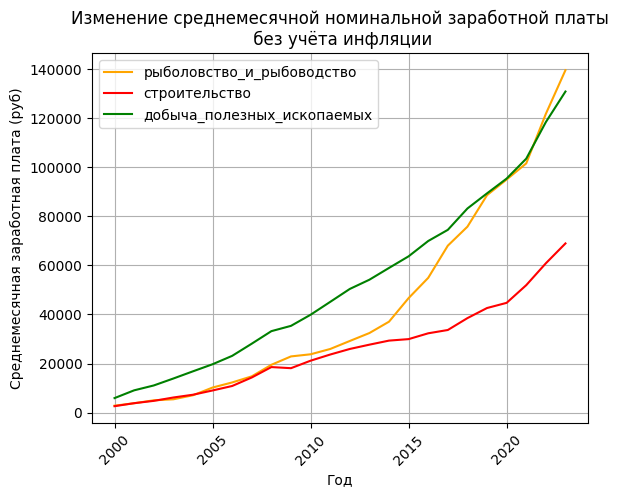

In [14]:
# Выбор цветов для линий на графике
colors = ['orange', 'red', 'green']

# Отображение графика
for i, row in salaries.iterrows():
    plt.plot(row.index, row.values, color=colors[salaries.index.get_loc(i)], label=i)

plt.title('Изменение среднемесячной номинальной заработной платы\n без учёта инфляции')
plt.xlabel('Год')
plt.ylabel('Среднемесячная заработная плата (руб)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Выводы:**
- Во всех трёх видах деятельности наблюдался рост
- Из интересных особенностей - изменение наклона роста зарплат в рыболовстве и рыбоводстве

Разница между средним и медианным значением в рыболовство_и_рыбоводство = 15937.816666666666


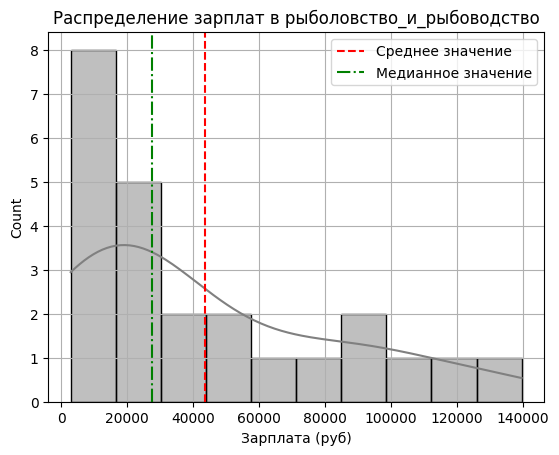

Разница между средним и медианным значением в строительство = 1316.3083333333343


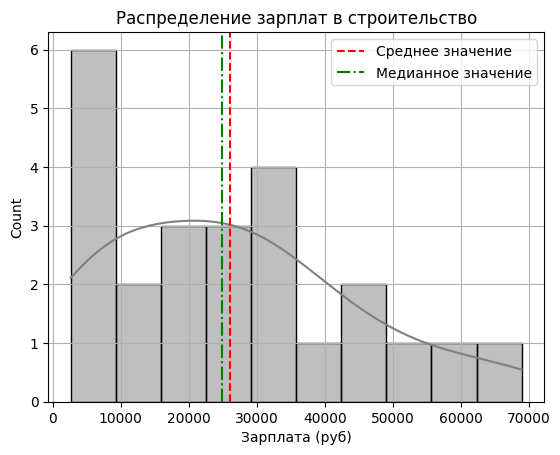

Разница между средним и медианным значением в добыча_полезных_ископаемых = 5301.695833333324


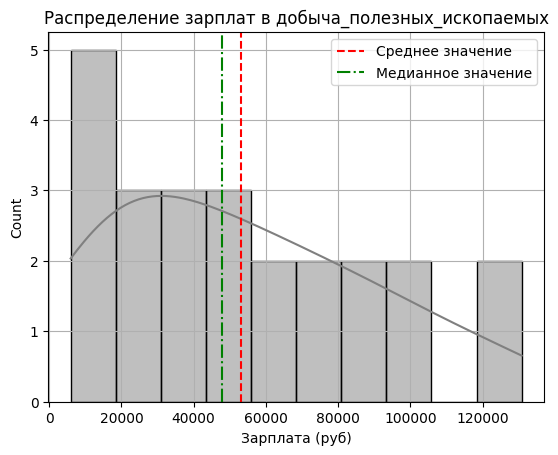

In [15]:
activities = ['рыболовство_и_рыбоводство', 'строительство', 'добыча_полезных_ископаемых']

# Цикл по отраслям
for act in activities:
    # Выбор данных по отрасли
    data = salaries.loc[act]

    mean = data.mean()
    median = data.median()

    print(f'Разница между средним и медианным значением в {act} = {mean - median}')

    # Отображение гистограммы
    sns.histplot(data=salaries.loc[act],
                 kde=True,
                 bins=10,
                 color='gray',
                 edgecolor='black',
                 linewidth=1
                 )

    # Настройка оформления графика
    plt.title(f'Распределение зарплат в {act}')
    plt.xlabel('Зарплата (руб)')
    plt.grid(True)

    # Добавление среднего и медианного значений на график
    plt.axvline(mean, color='red', linestyle='--', label='Среднее значение')
    plt.axvline(median, color='green', linestyle='-.', label='Медианное значение')
    plt.legend()


    # Отображение графика
    plt.show()



**Выводы**
- везде скошенное распределение
- максимальная разница между средним и медианным значением в "рыболовстве и рыбоводстве"

## Инфляция

In [16]:
inflation.isnull().any().any()

True

Есть пропущенные значения. Не будем рассматривать данные за годы, где есть пропуски.

Также нас интересуют данные только с 2000 года

In [17]:
inflation.dropna(inplace=True)
# inflation.index = inflation.index.str.replace(' ', '')
inflation = inflation.loc[2023:2000]

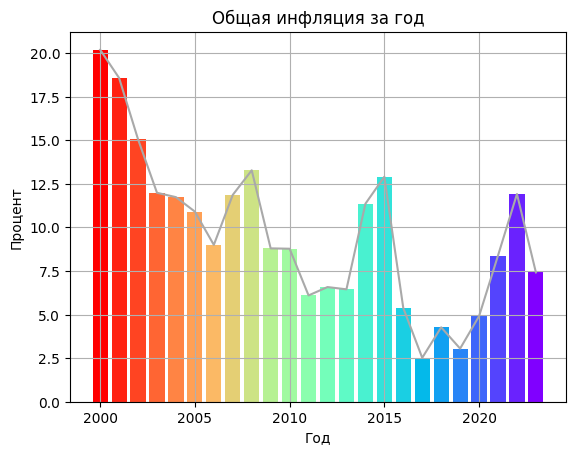

In [18]:
# Выбор данных по колонке 'Всего'
inflation_year_data = inflation['Всего']

# Создание бар-графика
colors = cm.rainbow(np.linspace(0, 1, len(inflation_year_data)))
plt.bar(inflation_year_data.index, inflation_year_data.values, color=colors)

plt.plot(inflation_year_data.index, inflation_year_data.values, color="darkgray")

# # Наложение кривой плотности распределения
# sns.kdeplot(iflation_year_data.values, color='black', fill=True)

# Настройка оформления графика
plt.title('Общая инфляция за год')
plt.xlabel('Год')
plt.ylabel('Процент')
plt.grid(True)

# Отображение графика
plt.show()

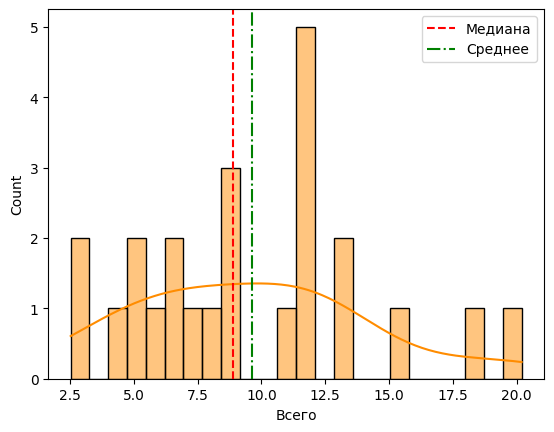

In [19]:
# Создание гистограммы
sns.histplot(data=inflation,
             x='Всего',
             bins=len(inflation),
             kde=True,
             color='darkorange')

# Нанесение медианного значения
median_value = inflation['Всего'].median()
plt.axvline(x=median_value, color='red', linestyle='--', label='Медиана')

# Нанесение среднего значения
mean_value = inflation['Всего'].mean()
plt.axvline(x=mean_value, color='green', linestyle='-.', label='Среднее')

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

**Выводы:**
- Стабильной тенденции по инфляции я не вижу.

# Реальная заработная плата.

In [20]:
salaries_real = pd.DataFrame(index=salaries.index, columns=salaries.columns)

Реальная зарплата = Номинальная зарплата / (1 + Инфляция)^(Количество лет с момента базового года)

In [21]:
# вычисляем реальные зарплаты для каждого года и вида деятельности
for year in salaries.columns:
    inflation_rate = inflation.loc[year, 'Всего'] / 100
    salaries_real[year] = salaries[year] / (1 + inflation_rate)

In [22]:
# salaries

In [23]:
# salaries_real

In [24]:
# другая формула для вычисления реальной заработной платы
# salaries_real_n = pd.DataFrame(index=salaries.index, columns=salaries.columns)
# # Перебираем все столбцы в датафрейме salaries
# for year in salaries.columns:
#     # Извлекаем значение инфляции за текущий год
#     inflation_rate = inflation.loc[year, 'Всего'] / 100
#     # Перебираем все строки в текущем столбце
#     for activity in salaries.index:
#         # Расчитываем реальную зарплату по формуле
#         real_salary = salaries.loc[activity, year] / (1 + inflation_rate)
#         # Записываем результат в новый датафрейм
#         salaries_real_n.loc[activity, year] = real_salary

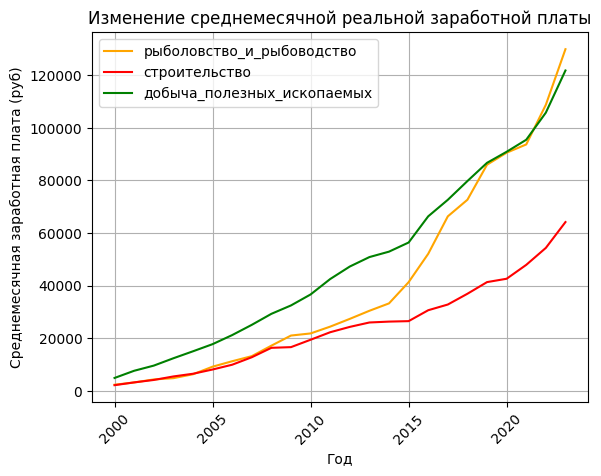

In [25]:
# Выбор цветов для линий на графике
colors = ['orange', 'red', 'green']

# Отображение графика
for i, row in salaries_real.iterrows():
    plt.plot(row.index, row.values, color=colors[salaries_real.index.get_loc(i)], label=i)

plt.title('Изменение среднемесячной реальной заработной платы')
plt.xlabel('Год')
plt.ylabel('Среднемесячная заработная плата (руб)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [26]:
def plot_salaries(salaries: pd.DataFrame,
                  salaries_real: pd.DataFrame,
                  inflation: pd.DataFrame,
                  activities: list) -> None:
    """
    Функция отрисовывает графики зарплат с отображением номинальной и реальной
    заработной платы для трёх видов деятельности
    """
    for activity in activities:
        fig, ax1 = plt.subplots(figsize=(8, 6))

        color = 'tab:brown'
        ax1.set_xlabel('Год')
        ax1.set_ylabel('Зарплата', color=color)
        ax1.plot(salaries.columns, salaries.loc[activity],
                 marker='*',
                 label='Номинальная зарплата',
                 color='red')
        ax1.plot(salaries_real.columns, salaries_real.loc[activity],
                 marker='x',
                 label='Реальная зарплата',
                 color='orange')
        ax1.bar(salaries.columns,
                salaries.loc[activity] - salaries_real.loc[activity],
                label='Дельта',
                color='darkgrey',
                # bottom=salaries_real.loc[activity]
                )
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Инфляция, %', color=color)
        ax2.plot(inflation.index, inflation['Всего'],
                 label='Инфляция',
                 marker='+',
                 color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.grid(True)
        plt.title(activity)
        ax1.legend(loc='upper center')
        ax2.legend(loc='upper right')
        plt.show()


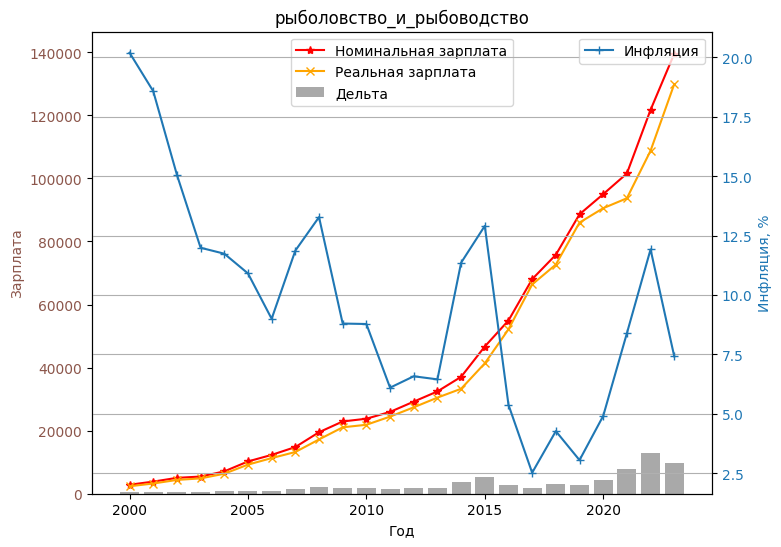

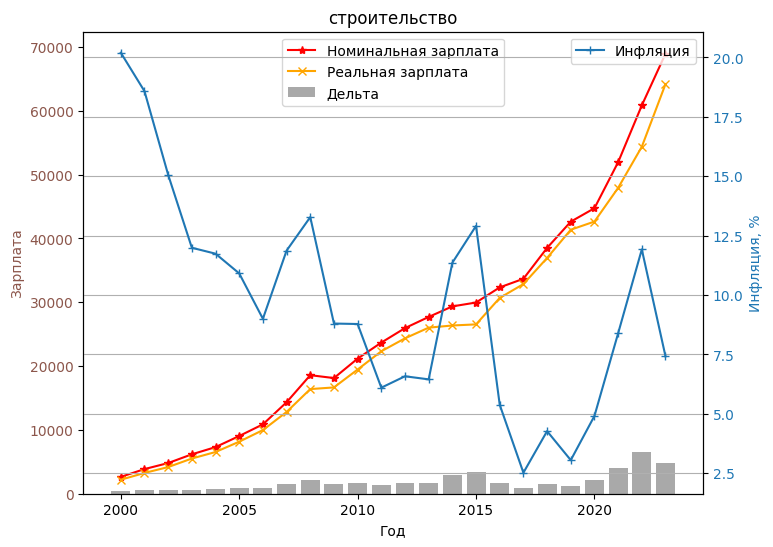

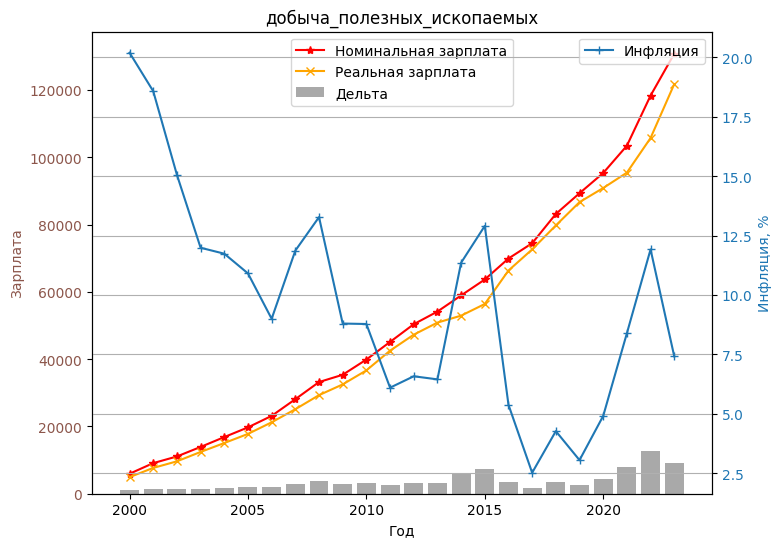

In [27]:
plot_salaries(salaries, salaries_real, inflation, activities)

In [28]:
# def plot_salaries(salary, salary_real, activity):
#     fig, ax = plt.subplots(figsize=(10, 6))

#     ax.plot(salary.index, salary.values, label='Номинальная зарплата')
#     ax.plot(salary_real.index, salary_real.values, label='Реальная зарплата')
#     ax.bar(salary.index, salary.values - salary_real.values, label='Дельта')

#     ax.set_title(f'Зарплаты в сфере {activity}')
#     ax.set_xlabel('Год')
#     ax.set_ylabel('Зарплата, руб.')
#     ax.legend()

#     plt.show()
# plot_salaries(salaries.loc['рыболовство_и_рыбоводство'], salaries_real.loc['рыболовство_и_рыбоводство'], 'Рыболовство и рыбоводство')

In [29]:
for activity in activities:
    nominal = salaries.loc[activity]
    real = salaries_real.loc[activity]
    correlation = nominal.corr(real)
    print(f"Корреляция между зарплатами для {activity}: {correlation:.6f}")
    # print(f"Корреляция между номинальной зарплатой и инфляцией для {activity}: {nominal.corr(inflation_year_data):.6f}")
    # print(f"Корреляция между номинальной зарплатой и инфляцией для {activity}: {real.corr(inflation_year_data):.6f}")

Корреляция между зарплатами для рыболовство_и_рыбоводство: 0.999080
Корреляция между зарплатами для строительство: 0.998714
Корреляция между зарплатами для добыча_полезных_ископаемых: 0.998642


**Выводы:**
- мы имеем большую корреляцию между реальной и номиальной зарплатами, не думаю, что это хоть сколько-нибудь существенно, но всё таки в рыбоводстве и рыболовстве эта корреляция выше
- Для рыбоводства и рыболовства, пожалуй, не видно явного влияния инфляции. Но для других сфер деятельности можно говорить, что при росте инфляции в 2014-2015 годах рост реальной заработной платы  замедлялся

# Дополнительные исследования

- Кол-во безработных в РФ, в % к экономически активному населению (рабочей силе) - wikipedia.org
- Валовой внутренний продукт
(в текущих ценах, млрд.руб) - Ростат
- Индекс счастья - ВЦИОМ
- Численность населения с денежными доходами ниже границы бедности/величины прожиточного минимума - Росстат
- Суммарный коэффициент рождаемости (СКР) (всё население)- Росстат


In [30]:
URL_ADD_INFO = 'https://github.com/nedokormysh/Start_DS_Inflation_Salaries/raw/main/data/Other_char.xlsx'

In [31]:
other_info = pd.read_excel(URL_ADD_INFO, index_col=0)

In [32]:
other_info = other_info.apply(pd.to_numeric, errors='coerce')

Гипотезы о корреляции реального уровня зарплаты с другими показателями:

- Уровень безработицы: снижение уровня безработицы может привести к росту реальных зарплат, так как работодатели будут конкурировать за квалифицированных работников и будут готовы платить им больше.
- ВВП: рост ВВП может привести к росту реальных зарплат, так как это означает увеличение объема производства и услуг, а значит, и увеличение доходов компаний, которые могут быть перераспределены в виде зарплат.
- Индекс счастья: возможно, что уровень счастья населения коррелирует с уровнем реальных зарплат, так как более высокие зарплаты могут повышать удовлетворенность жизнью и улучшать качество жизни.
- Уровень бедности: снижение уровня бедности может быть связано с ростом реальных зарплат, так как более высокие зарплаты могут помочь людям выйти из нищеты и улучшить свое финансовое положение.
- СКР: реальный уровень зарплат может коррелировать с уровнем рождаемости, поскольку при высоком уровне рождаемости на рынок труда выходит больше молодых людей, готовых работать за более низкую зарплату. Впрочем, это явно отложенный эффект

In [33]:
df = pd.concat([salaries_real, other_info], axis=0)

In [34]:
df = df.T

Text(0.5, 1.0, 'Треугольная тепловая карта корреляции Пирсона')

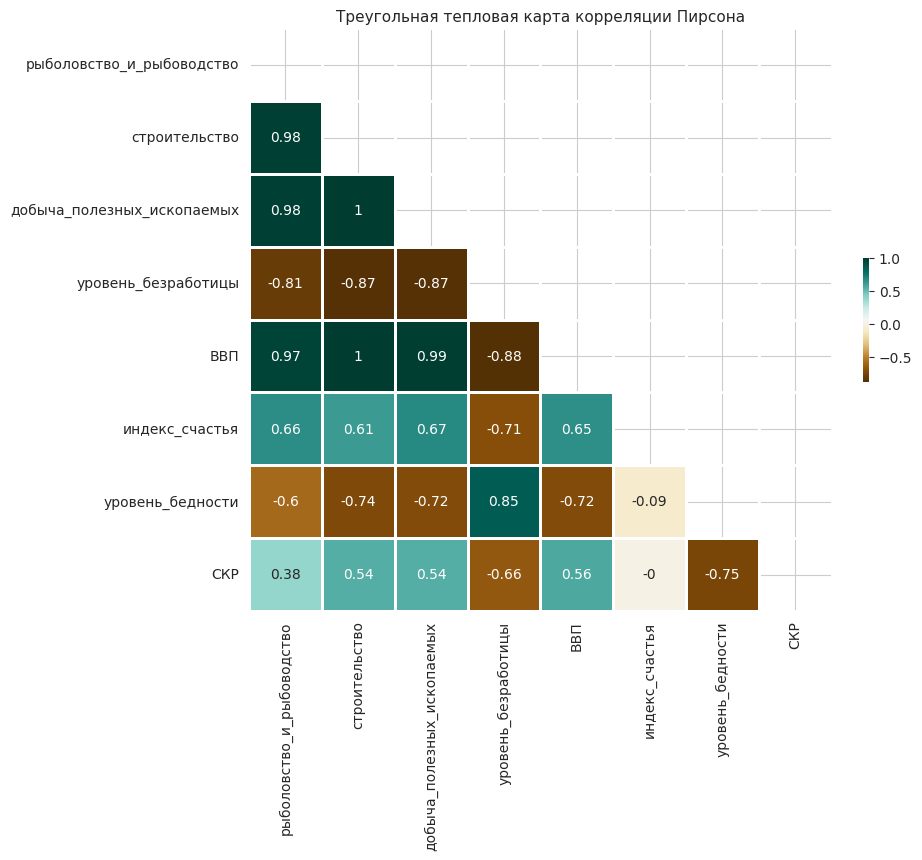

In [35]:
fig = plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(df.corr(
        numeric_only=True
    ), dtype=bool))

heatmap = sns.heatmap(df.corr(numeric_only=True ).round(2),
                          annot=True,
                          square=True,
                          cmap="BrBG",
                          cbar_kws={"fraction": 0.01},
                          linewidth=2,
                          mask=mask,
                          )

heatmap.set_title("Треугольная тепловая карта корреляции Пирсона", fontdict={"fontsize": 11}, pad=5)

**Выводы:**
- в принципе, все выбранные характеристики (пожалуй кроме СКР) имеют сильную линейную взаимосвязь с реальными зарплатами
- уровень безработицы имеет слабую корреляцию с СКР и индексом счастья
- ВВП чуть хуже линейно связан с СКР и индексом счастья
- индекс счастья меньше всего коррелирует с уровнем бедности и СКР
- уровень бедности вообще не имеет линейной корреляции только с индексом счастья

Нормируем значения и отобразим все полученные характеристики на одном графике.

In [36]:
norm_df = df.copy()  # создаем копию датафрейма

for col in norm_df.columns:
    max_value = norm_df[col].max()
    norm_df[col] = norm_df[col] / max_value

In [44]:
norm_df.loc[2000: 2003]

,рыболовство_и_рыбоводство,строительство,добыча_полезных_ископаемых,уровень_безработицы,ВВП,индекс_счастья,уровень_бедности,СКР
2000,0.018227,0.034218,0.040578,1.000000,0.042713,NaN,1.000000,0.672482
2001,0.024928,0.050709,0.063006,0.839623,0.052289,NaN,0.948276,0.688239
2002,0.033667,0.065092,0.079076,0.754717,0.063321,NaN,0.848276,0.723692
2003,0.037431,0.085934,0.102004,0.773585,0.076474,NaN,0.700000,0.742262


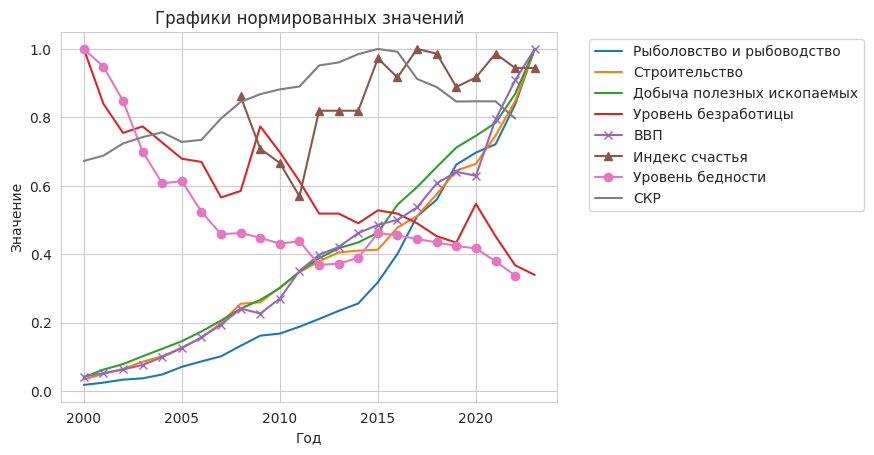

In [37]:
# добавляем линии для каждой характеристики
plt.plot(norm_df.index, norm_df['рыболовство_и_рыбоводство'], label='Рыболовство и рыбоводство')
plt.plot(norm_df.index, norm_df['строительство'], label='Строительство')
plt.plot(norm_df.index, norm_df['добыча_полезных_ископаемых'], label='Добыча полезных ископаемых')
plt.plot(norm_df.index, norm_df['уровень_безработицы'], label='Уровень безработицы')
plt.plot(norm_df.index, norm_df['ВВП'], marker='x',label='ВВП')
plt.plot(norm_df.index, norm_df['индекс_счастья'], marker='^', label='Индекс счастья')
plt.plot(norm_df.index, norm_df['уровень_бедности'], marker='o', label='Уровень бедности')
plt.plot(norm_df.index, norm_df['СКР'], label='СКР')

# добавляем легенду
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# добавляем подписи осей
plt.xlabel('Год')
plt.ylabel('Значение')
plt.title('Графики нормированных значений')

# показываем график
plt.show()